<a href="https://colab.research.google.com/github/mashhood9/Autoencoder-/blob/master/Image_Denoising_using_AutoEncoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Load dataset 
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


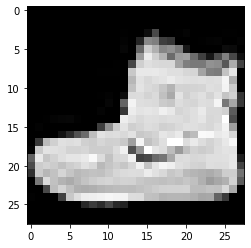

In [3]:
# Visualize a sample image
plt.imshow(x_train[0], cmap='gray')

In [4]:
# check out the shape of the training data
x_train.shape

(60000, 28, 28)

In [5]:
# check out the shape of the testing data
x_test.shape



(10000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
y_test.shape

(10000,)

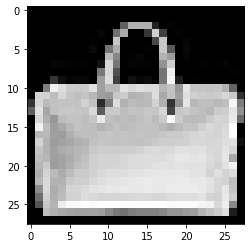

In [8]:
# Let's view some images!
i = random.randint(1,60000)
plt.imshow(x_train[i], cmap='gray')

In [9]:

label=y_train[i]
label

8

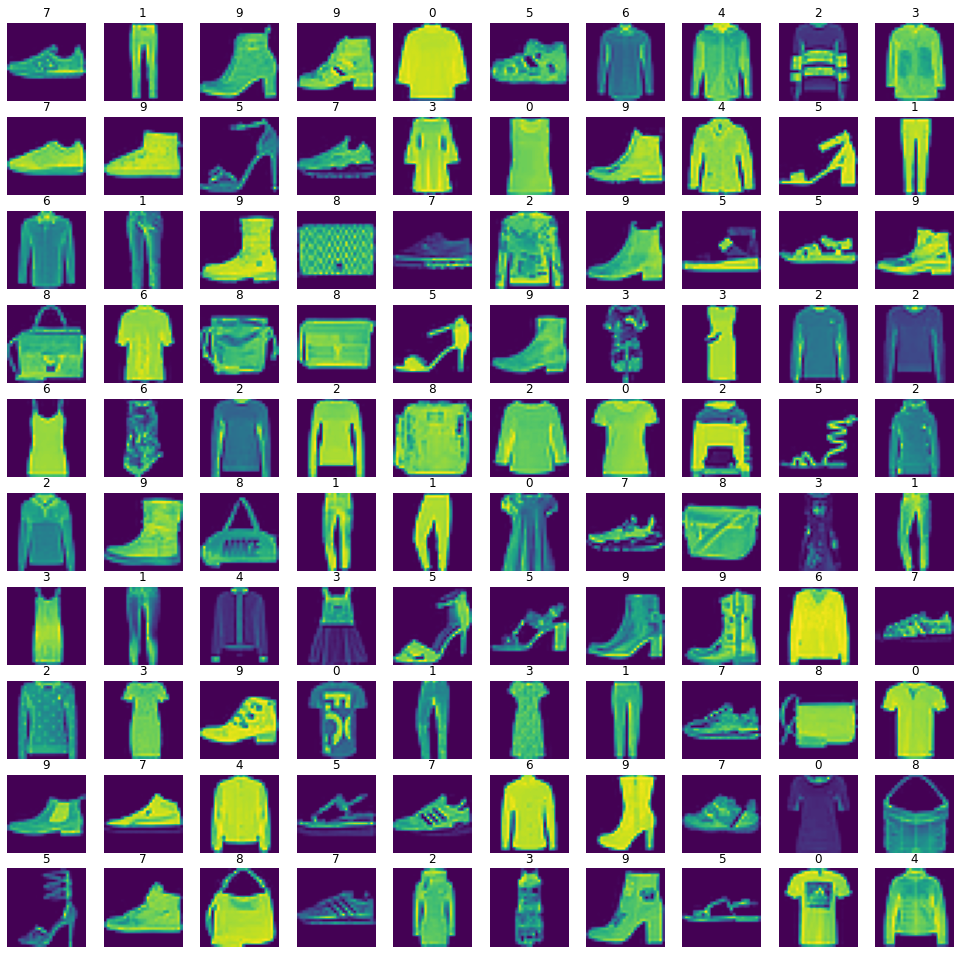

In [10]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(x_train) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid*L_grid):
    index=np.random.randint(0, n_training)
    axes[i].imshow(x_train[index])
    axes[i].set_title(y_train[index], fontsize=12)
    axes[i].axis('off') 


In [11]:
# normalize data
x_train=x_train/255
x_test=x_test/255
x_test

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [0]:
# add some noise
noise_factor=0.1
noise_dataset = []
for img in x_train:
    noisy_image= img +noise_factor * np.random.randn(*img.shape)
    noisy_image=np.clip(noisy_image,0,1)
    noise_dataset.append(noisy_image)

In [0]:
noise_dataset = np.array(noise_dataset)

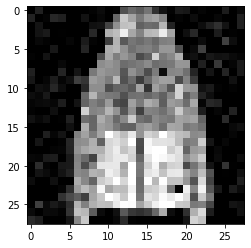

In [14]:
plt.imshow(noise_dataset[22], cmap='gray')

In [0]:
noise_factor= 0.1
noise_dataset_test=[]

for img in x_test:
    noisy_image=img + noise_factor*np.random.randn(*img.shape)
    noisy_image = np.clip(noisy_image, 0 , 1)
    noise_dataset_test.append(noisy_image )

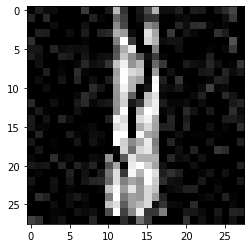

In [16]:
# add noise to testing dataset
noise_dataset_test = np.array(noise_dataset_test)
plt.imshow(noise_dataset_test[32], cmap='gray')

In [0]:
autoencoder = tf.keras.models.Sequential()
#encoder
autoencoder.add(tf.keras.layers.Conv2D(filters = 16, kernel_size= 3, strides=2, padding='same', input_shape=(28,28,1) ))
autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size= 3, strides=2, padding='same'))
autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size= 3, strides=1, padding='same'))

#decoder
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 16, kernel_size= 3, strides=2, padding='same'))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 1, kernel_size= 3, strides=2, activation = 'sigmoid', padding='same'))



In [18]:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001))
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [19]:
autoencoder.fit(noise_dataset.reshape(-1, 28, 28, 1),
               x_train.reshape(-1, 28, 28, 1),
               epochs = 10,
               batch_size = 200,
               validation_data = (noise_dataset_test.reshape(-1, 28, 28, 1), x_test.reshape(-1, 28, 28, 1)))

Epoch 1/10
300/300 [==============================] - 1s 4ms/step - loss: 0.3874 - val_loss: 0.3091
Epoch 2/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2982 - val_loss: 0.2943
Epoch 3/10
300/300 [==============================] - 1s 3ms/step - loss: 0.2883 - val_loss: 0.2872
Epoch 4/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2826 - val_loss: 0.2829
Epoch 5/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2794 - val_loss: 0.2805
Epoch 6/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2777 - val_loss: 0.2792
Epoch 7/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2767 - val_loss: 0.2785
Epoch 8/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2760 - val_loss: 0.2779
Epoch 9/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2756 - val_loss: 0.2775
Epoch 10/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2752 - val_loss: 0.2771

In [20]:
evaluation = autoencoder.evaluate(noise_dataset_test.reshape(-1,28,28,1), x_test.reshape(-1,28,28,1))
print(evaluation)

313/313 [==============================] - 1s 2ms/step - loss: 0.2771
0.2771114706993103


In [0]:
predicted=autoencoder.predict(noise_dataset_test[:10].reshape(-1,28,28,1))

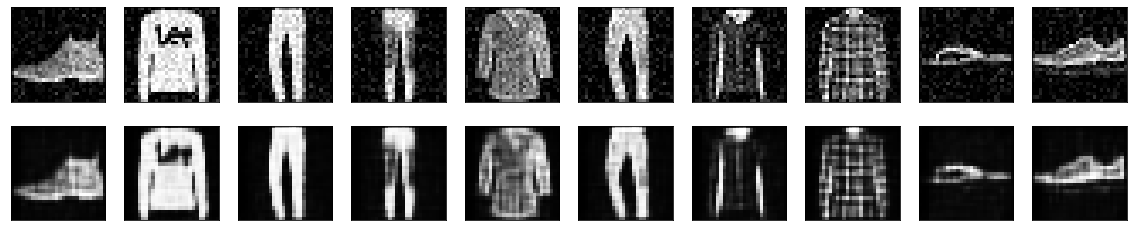

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([noise_dataset_test[:10], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

- 0 = T-shirt/top
- 1 = Trouser
- 2 = Pullover
- 3 = Dress
- 4 = Coat
- 5 = Sandal
- 6 = Shirt
- 7 = Sneaker
- 8 = Bag
- 9 = Ankle boot